# Laboratory work 6
## by Skuratovets Polina KN-222b.e

In [33]:
N = ord('P') % 5 + 1
print("Variant #",N)

Variant # 1


In [34]:
import cv2
import numpy as np
import pandas as pd
from PIL import Image
import os
from IPython.display import Image as IPImage

In [35]:
def load_dataframe(filename):
    return pd.read_excel(filename)

def get_variant_data(df, variant):
    return df.iloc[variant - 1]

def color_from_string(color_name):
    colors = {
        'red': (0, 0, 255),
        'blue': (255, 0, 0),
        'green': (0, 255, 0),
        'cian': (255, 255, 0),
        'magenta': (255, 0, 255),
        'yellow': (0, 255, 255)
    }
    return colors.get(color_name.lower(), (0, 0, 255))

def add_glasses(image_path, output_size, glasses_color, line_width):
    
    pil_image = Image.open(image_path)
    
    opencv_image = cv2.cvtColor(np.array(pil_image), cv2.COLOR_RGB2BGR)
    gray = cv2.cvtColor(opencv_image, cv2.COLOR_BGR2GRAY)
    
   
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    
    
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    if len(faces) == 0:
        raise ValueError("No faces detected in the image")
    
    (x, y, w, h) = faces[0]
    face_center = (x + w // 2, y + h // 2)
    
    img_width, img_height = pil_image.size
    target_width, target_height = output_size
    
    left = max(face_center[0] - target_width // 2, 0)
    top = max(face_center[1] - target_height // 2, 0)
    right = min(face_center[0] + target_width // 2, img_width)
    bottom = min(face_center[1] + target_height // 2, img_height)
    
    if right - left < target_width:
        if left == 0:
            right = target_width
        else:
            left = img_width - target_width
    if bottom - top < target_height:
        if top == 0:
            bottom = target_height
        else:
            top = img_height - target_height
            

    pil_image = pil_image.crop((left, top, right, bottom))
    pil_image = pil_image.resize(output_size)
    

    image = cv2.cvtColor(np.array(pil_image), cv2.COLOR_RGB2BGR)
    

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    if len(faces) == 0:
        raise ValueError("No faces detected in cropped image")
    
    (x, y, w, h) = faces[0]
    face_roi = gray[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(face_roi, 1.1, 5)
    
    if len(eyes) < 2:
        raise ValueError("Could not detect both eyes")
    
   
    eyes = sorted(eyes, key=lambda x: x[0])
    
    
    bgr_color = color_from_string(glasses_color)
    
  
    for eye in eyes[:2]:
        ex, ey, ew, eh = eye
        center = (x + ex + ew//2, y + ey + eh//2)
        radius = max(ew, eh) // 2 + 5
        cv2.circle(image, center, radius, bgr_color, line_width)
    
    # Draw bridge and temples
    if len(eyes) >= 2:
        eye1 = eyes[0]
        eye2 = eyes[1]
        bridge_start = (x + eye1[0] + eye1[2], y + eye1[1] + eye1[3]//2)
        bridge_end = (x + eye2[0], y + eye2[1] + eye2[3]//2)
        cv2.line(image, bridge_start, bridge_end, bgr_color, line_width)
        
        temple_length = int(w * 0.3)
        left_start = (x + eye1[0], y + eye1[1] + eye1[3]//2)
        left_end = (left_start[0] - temple_length, left_start[1] + temple_length//2)
        cv2.line(image, left_start, left_end, bgr_color, line_width)
        
        right_start = (x + eye2[0] + eye2[2], y + eye2[1] + eye2[3]//2)
        right_end = (right_start[0] + temple_length, right_start[1] + temple_length//2)
        cv2.line(image, right_start, right_end, bgr_color, line_width)
    
    return image

def process_image(variant_data):
   
    width, height = map(int, variant_data['image size'].split('x'))
    
   
    result = add_glasses(
        variant_data['file name'],
        (width, height),
        variant_data['glasses color'],
        variant_data['line width']
    )
    

    output_filename = f"output_{variant_data['file name']}"
    cv2.imwrite(output_filename, result)
    return output_filename






In [44]:
df=pd.read_excel("lab6.xlsx")
df

,N,file name,image size,glasses color,line width
0,1,emma-watson2.jpg,300x300,red,2
1,2,emma-watson.jpg,400x400,blue,3
2,3,draco.jpg,700x700,cian,4
3,4,longbottom.jpg,600x600,magenta,5
4,5,ron_wesley.jpg,500x500,yellow,6


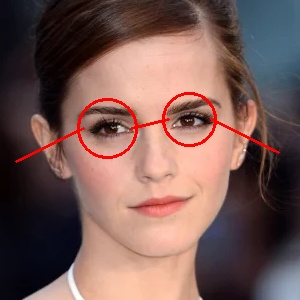

In [46]:

variant_data = get_variant_data(df, N)
output_file = process_image(variant_data)

display(IPImage(output_file))

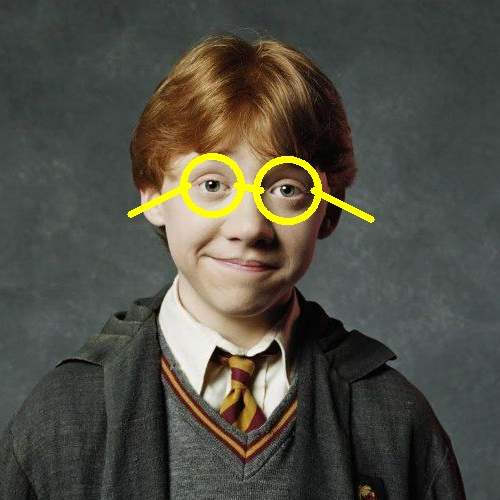

In [47]:
variant_data = get_variant_data(df, 5)
output_file = process_image(variant_data)

display(IPImage(output_file))

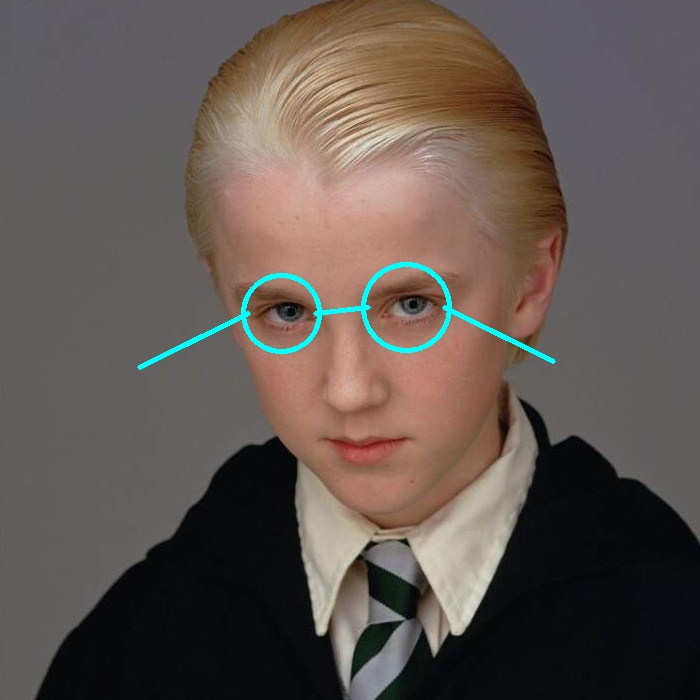

In [48]:
variant_data = get_variant_data(df, 3)
output_file = process_image(variant_data)

display(IPImage(output_file))

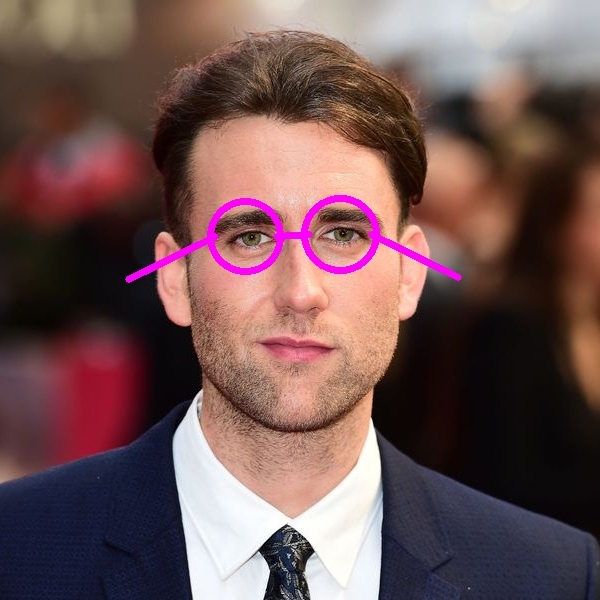

In [49]:
variant_data = get_variant_data(df, 4)
output_file = process_image(variant_data)

display(IPImage(output_file))